# Day 1 Tutorial: Pima Indian Diabetes

Welcome to the Day 1 session of the SPAI Advanced Machine Learning Workshop. In this tutorial notebook, the objective is to explore using pipelines and try using extra preprocessing methods using the `scikit-learn` library.

## Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases, sourced from [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database). The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

| Features | Descriptions |
| :--      | :---         |
| Pregnancies | Number of times pregnant |
| Glucose | Plasma gluscose concentration a 2 hours in an oral glucose tolerance test |
| BloodPressure | Diastolic blood pressure ($mm$ $Hg$) |
| SkinThickness | Triceps skin fold thickness ($mm$) |
| Insulin | 2-Hour serum insulin ($mu$ $U/ml$)
| BMI | Body mass index ($\frac{Weight(kg)}{Height(m)^2}$)
| DiabetesPedigreeFunction | Diabetes Pedigree Function |
| Age | Age (year) |
| Outcome | 0: Does not have diabetes; 1: Have Diabetes |

## Objective

**Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes?**



In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Matplotlib stylings
%matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['figure.autolayout'] = True

## Data Injestion

Let us begin the journey by first importing the data from the `.csv` file from the kaggle website. For the sake of this exercise, the dataset have been uploaded to the Github Repository and is accessible via the link below.

Churn for Bank Customers Link : 
```
https://raw.githubusercontent.com/TYH71/Advance_ML_Workshop/main/Day%201/diabetes.csv
```

In [ ]:
# Import .csv as a DataFrame using pandas .read_csv function
diabetes = pd.read_csv('https://raw.githubusercontent.com/SPAI-Team/Advanced-ML-Workshop-2021/main/Datasets/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis
In our attempt to better understand the dataset, we will be performing EDA by using `pandas` library for data manipulation and `matplotlib` & `seaborn` libraries for visualisation.

For the sake of the limited time in this workshop, we will be showing you the EDA process and code. If you are unclear about any of the methods used for EDA, do refer back to the Tutorial and Practical notebook from [SPAI Beginner Machine Learning Bootcamp 2021](https://github.com/Tien-Cheng/ML-Bootcamp-2021/tree/main/Beginner%20Machine%20Learning%20Bootcamp).



In [ ]:
# DataFrame Information
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes.shape # Show the number of records and number of features

(768, 9)

In [ ]:
# Descriptive Statistics on Numerical Columns
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


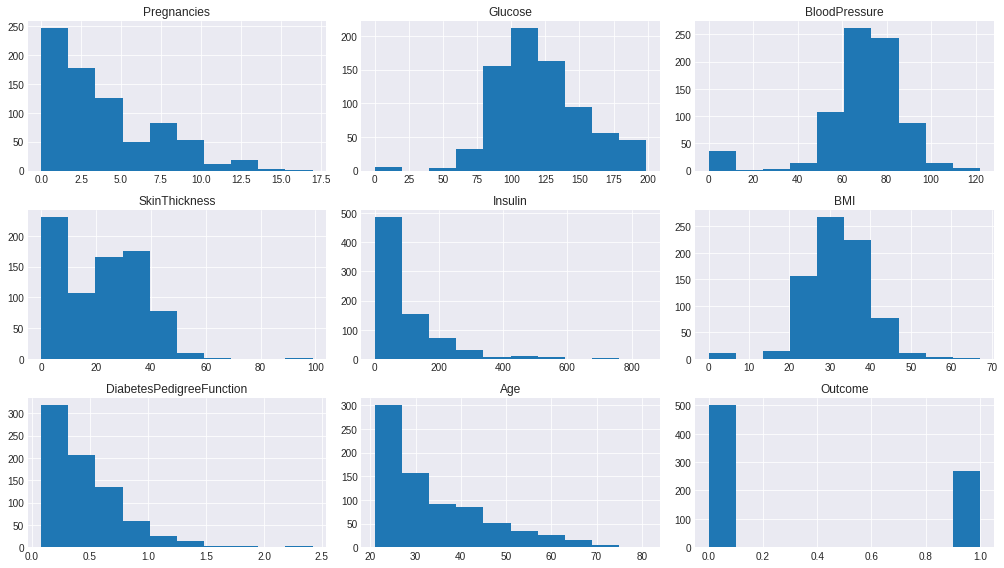

In [ ]:
# Distribution of Numerical Features
diabetes.hist()
plt.show()

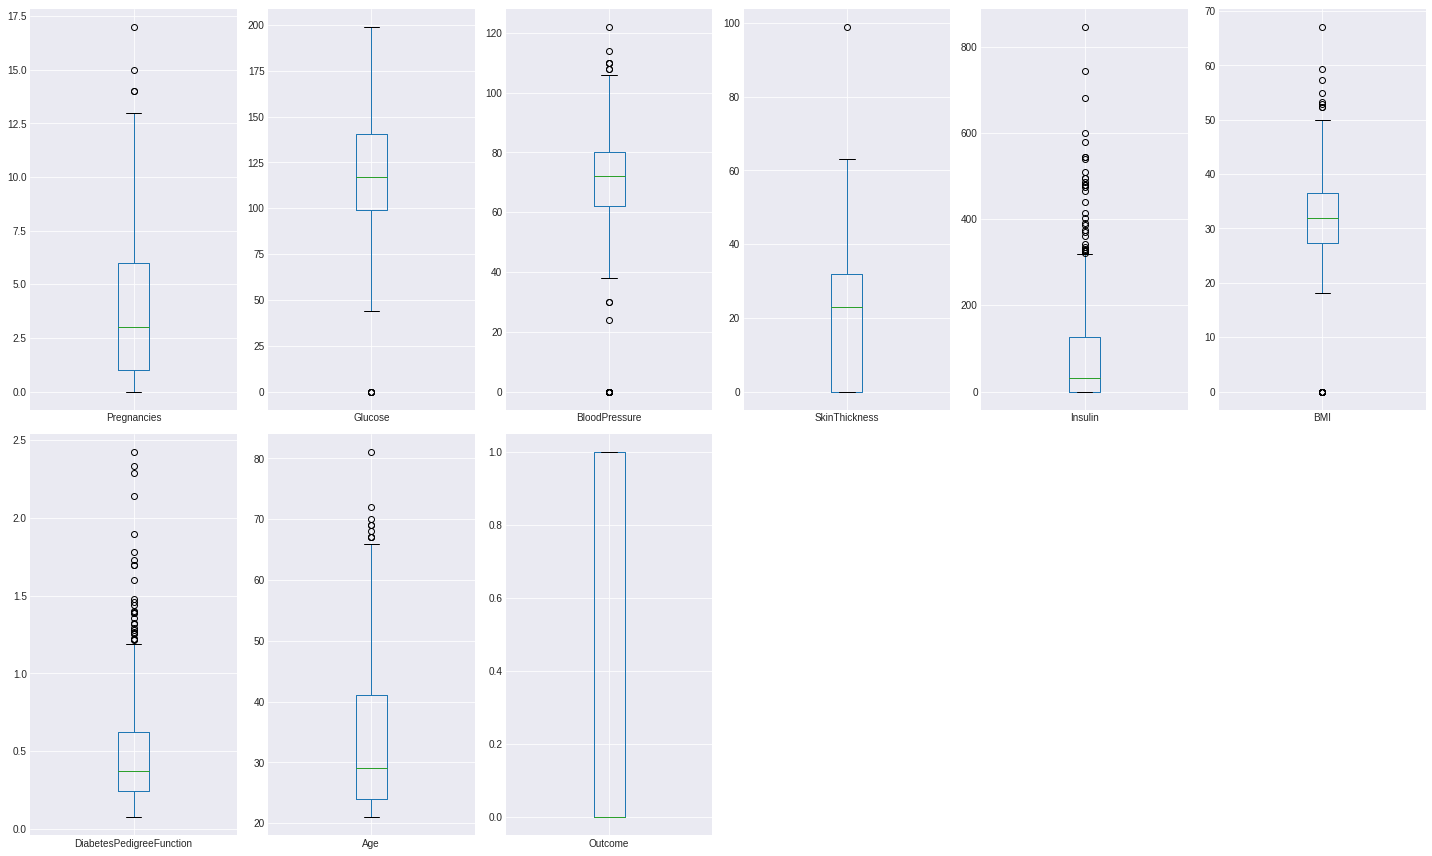

In [ ]:
# Boxplots on all Numerical Columns
diabetes.plot(kind='box', figsize=(20, 12), layout=(2, 6), subplots=True)
plt.show()

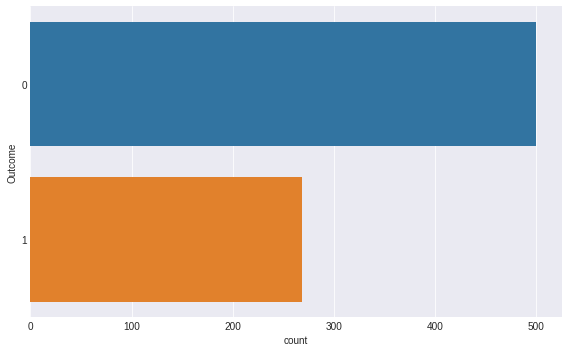

In [ ]:
# Anlayse on Target Variable - Outcome
sns.countplot(y=diabetes['Outcome'])
plt.show()

In [ ]:
impute_cols = ['SkinThickness', 'Age', 'Insulin', 'BMI', 'Glucose', 'BloodPressure']
diabetes[impute_cols] = diabetes[impute_cols].replace(0, np.nan) # Replace 0 with Null Values
diabetes[impute_cols]

,SkinThickness,Age,Insulin,BMI,Glucose,BloodPressure
0,35.0,50,NaN,33.6,148.0,72.0
1,29.0,31,NaN,26.6,85.0,66.0
2,NaN,32,NaN,23.3,183.0,64.0
3,23.0,21,94.0,28.1,89.0,66.0
4,35.0,33,168.0,43.1,137.0,40.0
...,...,...,...,...,...,...
763,48.0,63,180.0,32.9,101.0,76.0
764,27.0,27,NaN,36.8,122.0,70.0
765,23.0,30,112.0,26.2,121.0,72.0
766,NaN,47,NaN,30.1,126.0,60.0


## Data Partition

In any supervised learning task, our first step we should take is splitting the data into training and testing sets, in order to properly do any evaluation. Here, we would go for the standard 8:2 ratio, setting aside 20% of the data for testing.



In [ ]:
# Import Splitting Function
from sklearn.model_selection import train_test_split

In [ ]:
# Define X (Input/Features) and y (Output/Target/Label)
X = diabetes.drop(columns = 'Outcome')
y = diabetes['Outcome']

# Shape of DataFrame
print('X Shape:\t', X.shape)
print('y Shape:\t', y.shape)

X Shape:	 (768, 8)
y Shape:	 (768,)


In [ ]:
# Splitting into 8:2 training-testing sets
X_train, X_test, y_train, y_test = train_test_split(___, ___, test_size=.2, random_state=42)

# Shape of DataFrame
print('Training Set:\t', X_train.shape, y_train.shape)
print('Testing Set:\t', X_test.shape, y_test.shape)

AttributeError: ignored

## Pipeline

`scikit-learn` offers a Pipeline function to list down multiple transformers and a final estimator, all done in a sequential order. You can think of it like stacking multiple water pipes together, where in this context our data is water, allowing our data to flow through and produce our desired results.

**Data Leakage**

Another benefit of using Pipeline is preventing any form of data leakage. Data Leakage is leaking any information from outside the training set, in this case the testing set, to train the the model.

Here we are going to use a simple model, Logistic Regression, to demostrate implementing an estimator into a pipeline.



In [ ]:
# Import `scikit-learn` Functions
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
%%time
# Initial Pipeline
lr_pipe = Pipeline(
    steps=[
      ('Imputer', SimpleImputer(strategy='median')),
      ('Model', LogisticRegression(max_iter=500)) # increase max iteration to ensure training reaches convergence
    ]
)

# Fitting Pipeline to training set
lr_pipe.fit(X_train, y_train)

In [ ]:
# Generate Predictions
y_pred = lr_pipe.predict(X_test)
y_train_pred = lr_pipe.predict(X_train)

# Calculating Classification Metrics
print('Accuracy Score:', accuracy_score(___, ___))
print('F1 Score:', f1_score(___, ___))

### Feature Scaling

Simple z-score standardization to improve performance of Logistic Regression. More information can be found in either Advance Machine Learning Workshop Day 0 or Beginner Machine Learning Bootcamp Materials.

$$Z=\frac{X-\mu}{\sigma}$$

Here, we are going to implement `StandardScaler` into the pipeline to demostrate the power and convenience of using pipelines.


In [ ]:
%%time
'''
Task, implement these classes into the pipeline:
1. SimpleImputer with strategy 'mean'
2. StandardScaler
3. LogisticRegression with max_iter=500
'''
lr_preprocess_pipe = Pipeline(
    steps=[
      ('Imputer', ___),
      ('Standardization', ___),
      ('Model', ___))
    ]
)

# Fitting Pipeline to training set
lr_preprocess_pipe.fit(____, ____)

In [ ]:
# Generate Predictions
y_pred = lr_preprocess_pipe.predict(____)

# Calculating Classification Metrics
print('Accuracy Score:\t', accuracy_score(____, ____))
print('F1 Score:\t', f1_score(____, ____))

## Log Transformation

A normal distrbution, also known as a Gaussian Distribution, is essentially important when training models, typically distance-based, probabilistic-based, or linear models. However, not all data given are so nice, as such we have to perform Log Transformation to deskew the data.

Log Transformation ensure that the quantitative continuous feature follows a normal distribution, while keeping the relative distance between data points intact. Here we used `np.log1p` since logarithm cannot be applied on 0 or negative values.

$$Log_e(x+1)$$

**Sidenote**: there are other ways to deskew the data such as power transform, boxcox transform; but log transformation is the simplest way.

In [ ]:
# Import Relevant Functions for Log Transformation
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
# Display Histogram
diabetes.hist()
plt.show()

**Observations**

- 'Pregnancies', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age' does not follow a normal distribution
- 'Outcome' has imbalance classes

In [ ]:
# Numerical Columns which does not follow a normal distribution
skewed = ['Pregnancies', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']

# Apply log(x+1) transformation
diabetes[skewed].apply(____).hist()
plt.show()

Noticed here there is `ColumnTransformer` and `FunctionTransformer`, these two functions is used to ensure that we can apply Log Transformation properly on this dataset.

- `ColumnTransformer`: Transform only specified columns
- `FunctionTransformer`: Embed a third party function, typically a `numpy` function, inside a transformer


In [ ]:
print(skewed)

In [ ]:
# Create Transformer to apply Log Transform
log_transform = ColumnTransformer(
    transformers=[
      ('Log Transform Class', FunctionTransformer(
          func=np.log1p, # main function for transformation
          ), skewed # specified columns
      )
    ], remainder='passthrough' # argument ensures that the transformers does not touch the rest of the columns
)

# Display Class
print(log_transform)

In [ ]:
%%time
# Pipeline with Log Transformation, and Standardization
''''''
log_transform_pipe = Pipeline(
    steps=[
      ('Log Transform', ____),
      ('Imputer', SimpleImputer(strategy='mean')),
      ('Standardization', StandardScaler()),
      ('Model', LogisticRegression(max_iter=500))
    ]
)

# Fitting Pipeline to training set
log_transform_pipe.fit(X_train, y_train)

In [ ]:
# Generate predictions
y_pred = log_transform_pipe.predict(X_test)

# Calculating Classification Metrics
print('Accuracy Score:\t', accuracy_score(y_test, y_pred))
print('F1 Score:\t', f1_score(y_pred, y_test))

## Imbalance Classes

**Imbalance classes** is when the total number of a class of data, minority class, is far less than the total number of another class of data, majority class. This occurs only in classification tasks.

**Why are Imbalance Classes bad?**

Having imbalance classes causes the model to tend to only predict the majority class, hence, misclassifying a lot more of the minority class as compared to the majority class. 

**How to counter Imbalance Classes?**

Generally, there are two methods - Undersampling and Oversampling. We are going to use `imblearn` library to do these task, as `scikit-learn` does not offer any of these functions. Don't worry, `imblearn` syntax is similar to `scikit-learn` as it is a dependency library.

In [ ]:
# Import Function
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Frequency Count on the Target Variable Classes
sns.countplot(y=y_train)
plt.show()

### Undersampling

When you take small samples from the majority class in order for the majority class to have the same size as the minority class. Undersampling causes us to mistakenly discard potentially useful data.


#### Random Under Sampler

A naive technique that selects the majority class data points where the average distance to the N closest samples of the minority class is the smallest. In other words, it selects majority class data points that is closest to a minority class data point.

In [ ]:
# Initiate and .fit RandomUnderSampler class
RUS = RandomUnderSampler()
RUS.fit(X_train.apply(lambda x: x.fillna(x.mean()),axis=0), y_train) # Quick way to fillna for each column

In [ ]:
# y_train after resampling using RandomUnderSampler
sns.countplot(y=RUS.fit_resample(X_train.apply(lambda x: x.fillna(x.mean()),axis=0), y_train)[1])
plt.show()

In [ ]:
%%time
# Pipeline with Log Transformation, Standardization, and RandomUnderSampler
'''
Task:
1. Implement RandomUnderSampler into the pipeline
'''

rus_pipe = Pipeline(
    steps=[
      ('Log Transform', log_transform),
      ('Imputation', SimpleImputer(strategy='mean')),
      ('Standardization', StandardScaler()),
      ('RandomUnderSampler', ___),
      ('Model', LogisticRegression(max_iter=500))
    ]
)

# Fitting Pipeline to training set
rus_pipe.fit(X_train, y_train)

In [ ]:
# Generate Predictions
y_pred = rus_pipe.predict(X_test)

# Calculating Classification Metrics
print('Accuracy Score:\t', accuracy_score(y_test, y_pred))
print('F1 Score:\t', f1_score(y_pred, y_test))

### Oversampling

When you make copies of the minority class so that the size of the minority class will be the same as the size of the majority class. Oversampling causes the model to potentially overfit.

Note: More on **overfitting** on Advance Machine Learning Workshop Day 2.

#### Random Over Sampler

RandomOverSampler duplicates some of the original samples of the minority classes.


In [ ]:
# Initiate and .fit RandomOverSampler
ROS = RandomOverSampler()
ROS.fit(X_train.apply(lambda x: x.fillna(x.mean()),axis=0), y_train)

In [ ]:
# y_train after resampling using RandomOverSampler
sns.countplot(y=ROS.fit_resample(X_train.apply(lambda x: x.fillna(x.mean()),axis=0), y_train)[1])
plt.show()

In [ ]:
%%time
# Pipeline with RandomOverSampler
'''
Task:
1. Implement RandomOverSampler into the pipeline
'''
ros_pipe = Pipeline(
    steps=[
      ('Log Transform', log_transform),
      ('Imputation', SimpleImputer(strategy='mean')),
      ('Standardization', StandardScaler()),
      ('RandomOverSampler', ____),
      ('Model', LogisticRegression(max_iter=500))
    ]
)

# Fitting Pipeline to training set
ros_pipe.fit(X_train, y_train)

In [ ]:
# Generate predictions
y_pred = ros_pipe.predict(X_test)

# Calculating Classification Metrics
print('Accuracy Score:\t', accuracy_score(y_test, y_pred))
print('F1 Score:\t', f1_score(y_pred, y_test))

#### SMOTE

SMOTE, Synthetic Minority Oversampling Technique, is a method in the imblearn library which allows you to increase the size of the minority class in a balanced way.

In [ ]:
# Initiate and .fit SMOTE class
smote = SMOTE()
smote.fit(X_train.apply(lambda x: x.fillna(x.mean()),axis=0), y_train)

In [ ]:
# y_train after resampling using SMOTE
sns.countplot(y=smote.fit_resample(X_train.apply(lambda x: x.fillna(x.mean()),axis=0), y_train)[1])
plt.show()

In [ ]:
%%time
# Pipeline with Log Transform, Standarization, and SMOTE
'''
Task:
1. Implement SMOTE into the pipeline
'''
smote_pipe = Pipeline(
    steps=[
      ('Log Transform', log_transform),
      ('Imputer', SimpleImputer(strategy='mean')),
      ('Standardization', StandardScaler()),
      ('SMOTE', ___),
      ('Model', LogisticRegression(max_iter=500))
    ]
)

# Fitting Pipeline to training set
smote_pipe.fit(X_train, y_train)

In [ ]:
# Generate Predictions
y_pred = smote_pipe.predict(X_test)

# Calculating Classification Metrics
print('Accuracy Score:\t', accuracy_score(y_test, y_pred))
print('F1 Score:\t', f1_score(y_pred, y_test))

#### ADASYN

ADASYN is a method in the `imblearn` library which allows you to increase the size of the minority class in a balanced way. ADASYN is similar to SMOTE. However, ADASYN’s size of generated synthetic data is dependent on the density of minority classes in the region.

In [ ]:
# Initiate and .fit ADASYN class
adasyn = ADASYN()
adasyn.fit(X_train.apply(lambda x: x.fillna(x.mean()),axis=0), y_train)

In [ ]:
# y_train after resampling using ADASYN
sns.countplot(y=adasyn.fit_resample(X_train.apply(lambda x: x.fillna(x.mean()),axis=0), y_train)[1])
plt.show()

In [ ]:
%%time
# Pipeline with Log Transform, Standardization, and ADASYN
'''
Task:
1. Implement ADASYN into the pipeline
'''
adasyn_pipe = Pipeline(
    steps=[
      ('Log Transform', log_transform),
      ('Imputer', SimpleImputer(strategy='mean')),
      ('Standardization', StandardScaler()),
      ('ADASYN', ADASYN()),
      ('Model', LogisticRegression(max_iter=500))
    ]
)

# Fitting Pipeline to training set
adasyn_pipe.fit(X_train, y_train)

In [ ]:
# Generate Predictions
y_pred = adasyn_pipe.predict(X_test)

# Calculating Classification Metrics
print('Accuracy Score:\t', accuracy_score(y_test, y_pred))
print('F1 Score:\t', f1_score(y_pred, y_test))

# Conclusion

After Day 1 in Advance Machine Learning Workshop, we have these Topics Covered:

- Pipline
- Additional Preprocessing Techniques
  - Log Transformation
  - Handling Imbalance Classes

In [ ]:
print('Notebook Finish Running')